# MENTAL HEALTH OF STUDENTS

Up until the most recent years, the psychological health of students was not really considered that important in the world. With more research and literacy however, we as a society have slowly come to realise just how vital mental and spiritual well-being is to our body, especially of young ones who are still highly malleable and easily fold under adverse circumstances for lack of understanding of its importance.

Here we have a dataset which contains the data collected from random students from a university in Indonesia, conducted to study the prevalence of lack thereof, of mental issues in their students.

## OBJECTIVES:
* Cleaning the data if any irregularities are observed.
* Using visualizations to observe any underlying facts or patterns.
* Draw conclusions from these observations.

### IMPORTING ALL RELEVANT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   #importing all required packages

explosion = [0.15,0] #explosion values for pie plots

df=pd.read_csv('Student Mental health AWP.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08-07-2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


We can determine the number of features (columns) and number of entries (rows) in the dataset using <code> shape </code> method.

In [2]:
df.shape

(101, 11)

### Splitting the Timestamp column into Date and Time columns

In [3]:
df[['date','time']] = df.Timestamp.str.split(expand=True)
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?', 'date', 'time'],
      dtype='object')

As seen above, the <code>Timestamp</code> column gets split into <code>Date</code> and <code>Time</code> columns which are place at the very last of the dataset.
So, we will move them to the first and second positions after popping out the <code>Timestamp</code> column.

In [4]:
df.drop(columns=['Timestamp'],inplace = True)
firstcol = df.pop('date')
df.insert(0,'Date',firstcol)

firstcol = df.pop('time')
df.insert(1,'Time',firstcol)

df.head()

,Date,Time,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020,12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08-07-2020,12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020,12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020,12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020,12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Renaming the columns Age onwards for simpler handling

Using the <code>rename</code> method we can rename all the columns we want to as shown below.

In [5]:
df.rename(columns = {'Choose your gender':'Gender',
                     'What is your course?':'Course',
                     'Your current year of Study':'Study_Year',
                     'What is your CGPA?':'CGPA',
                     'Marital status':'Marital_status',
                     'Do you have Depression?':'Depression',
                    'Do you have Anxiety?':'Anxiety',
                     'Do you have Panic attack?':'Panic_attacks',
                     'Did you seek any specialist for a treatment?':'Specialist_treatment'},
         inplace = True)
df.head()

,Date,Time,Gender,Age,Course,Study_Year,CGPA,Marital_status,Depression,Anxiety,Panic_attacks,Specialist_treatment
0,08-07-2020,12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08-07-2020,12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020,12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020,12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020,12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


As seen below, the names of the years have two variants that may lead to issues when we go ahead with our analysis. For theis we use <code>replace</code> method to replace all of them simultaneously.

## CLEANING UP STUDY YEAR COLUMN

In [6]:
df['Study_Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

The syntax for replacing multiple values from the DataFrame is as follows:
<code>
       df_name.replace(to_replace = list1, value = list2, inplace= True)
</code>

<code>list1</code> contains the values we want to replace and <code>list2</code> contains the values we wwant to replace <code>list1</code>'s values with.

In [7]:
#REPLACING YEAR NAMES
df.replace(to_replace=['Year 1','Year 2','Year 3','Year 4'], value=['year 1','year 2','year 3','year 4'],inplace=True)
df.sample(10) #PRINT RANDOM 10 ROWS

,Date,Time,Gender,Age,Course,Study_Year,CGPA,Marital_status,Depression,Anxiety,Panic_attacks,Specialist_treatment
13,08-07-2020,12:41,Male,19.0,Engineering,year 1,3.00 - 3.49,No,No,No,No,No
43,08-07-2020,15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No
63,08-07-2020,17:37,Female,24.0,engin,year 1,3.50 - 4.00,No,No,No,Yes,No
5,08-07-2020,12:31,Male,19.0,Engineering,year 2,3.50 - 4.00,No,No,No,Yes,No
99,13-07-2020,21:23,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
34,08-07-2020,14:41,Female,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
21,08-07-2020,13:13,Female,18.0,KOE,year 2,3.00 - 3.49,No,No,No,No,No
65,08-07-2020,17:50,Female,23.0,Econs,year 1,3.50 - 4.00,No,Yes,Yes,No,No
64,08-07-2020,17:46,Female,24.0,Engine,year 1,3.50 - 4.00,No,No,No,No,No
86,13-07-2020,10:34,Female,19.0,Fiqh fatwa,year 3,3.00 - 3.49,No,No,No,No,No


# DATA VISUALIZATION

We shall now perform various visualizations to draw conclusions and find patterns withing the data provided to us.

**NUMBER OF MALE AND FEMALS STUDENTS IN THE UNIVERSITY**

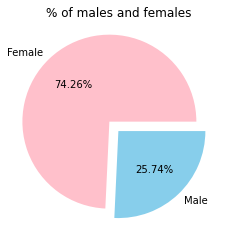

In [8]:
plt.title('% of males and females')
plt.pie( list(df['Gender'].value_counts()),labels = ['Female','Male'],
        autopct= '%.2f%%',colors=['pink','skyblue'],
       explode=explosion)
plt.show()

Almost 3/4th of all students in the university are femals and remaining male.

### What Percentage of students suffer from Depression, Anxiety and Panic Attacks?

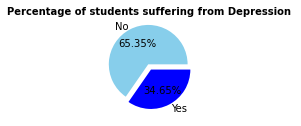

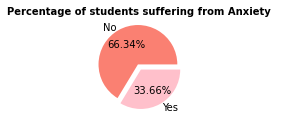

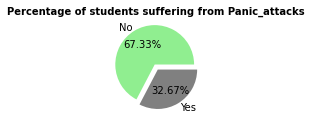

In [9]:
problems = {1:'Depression',2:'Anxiety',3:'Panic_attacks'}
colours = {1:['skyblue','blue'],2:['salmon','pink'],3:['lightgreen','grey']}
for i in range(1,len(problems)+1):
    plt.figure(figsize=(6,6))
    plt.subplot(1,3,i)
    plt.title(f'Percentage of students suffering from {problems[i]} ',weight='heavy',fontsize=10)
    plt.pie(list(df[problems[i]].value_counts()),labels = ['No','Yes'],
            autopct= '%.2f%%',colors=colours[i],
           explode = explosion)
    plt.show()

From the above pie charts, we can see the percentage of students suffering from the Listed mental problems.
* Depression - 34.65%
* Anxiety - 33.66%
* Panic Attacks - 32.67%

Looking purely from numerical standpoint, we can discern the number of students suffering from these problems using the <code> value_counts()</code> method as demonstrated below.

In [10]:
for i in problems:
    print(f"Number of Students Suffering from {problems[i]} - {df[problems[i]].value_counts()[1]}")

Number of Students Suffering from Depression - 35
Number of Students Suffering from Anxiety - 34
Number of Students Suffering from Panic_attacks - 33


**NOTE:** <code>value_counts()</code> provides us with 2 values for "No" and "Yes" in each of the columns above, making it display the 2nd value inside it reveals the number of data points containing the value "Yes".

### PREVALANCE OF MENTAL PROBLEMS BY STUDY YEAR

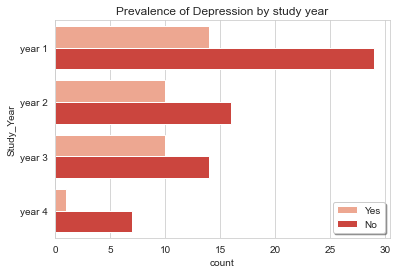

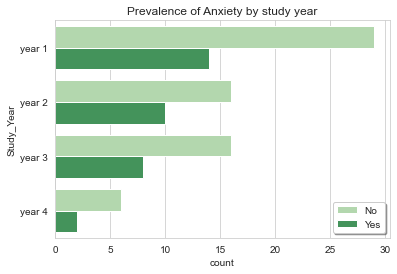

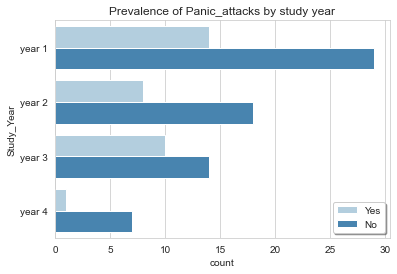

In [11]:
sns.set_style(style='whitegrid') #setting the background for the plots
problems=['Depression','Anxiety','Panic_attacks']
palettes = ['Reds','Greens','Blues']

for i in range(len(problems)):
    sns.countplot(data = df, palette=palettes[i], hue = problems[i], y='Study_Year')
    plt.title(f"Prevalence of {problems[i]} by study year")
    plt.legend(shadow=True)
    plt.show()

* As the statistic above shows us, students in <code>year 1</code> are leading in terms of suffering from the aforementioned mental issue. This may partially be because they have recently moved on from their school system into unknown waters which is the University.
* On the other hand, students in <code>year 4</code> show the least number of individuals suffering from depression, anxiety and panic attacks.
* There is an equal amount of students in <code>year 2</code> and <code>year 3</code> who experience depression. In case of anxiety, <code>year 2</code> has a few more than <code>year 3</code>. Meanwhile lesser students from <code>year 2</code> suffer from panic attacks than <code>year 3</code>.

## PREVALENCE OF MENTAL PROBLEMS BY GENDER

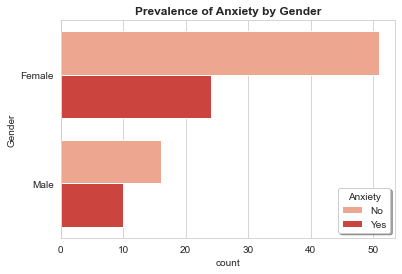

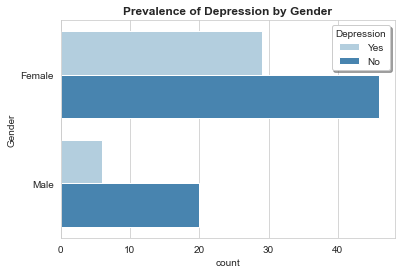

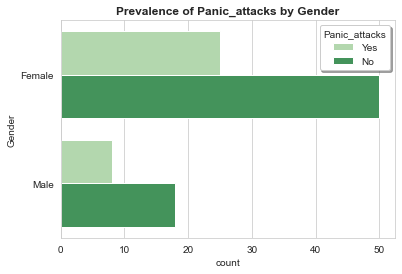

In [12]:
sns.set_style(style='whitegrid') #setting up a white grid background
problems = ['Anxiety','Depression','Panic_attacks']
palettes = ['Reds','Blues','Greens']

for i in range(len(problems)): #for loop to print all visualizations
    
    sns.countplot(y='Gender',hue=problems[i],palette=palettes[i],data=df).set_title(
    f"Prevalence of {problems[i]} by Gender", weight='heavy')
    plt.legend(shadow=True,title=problems[i])
    
    plt.show()

Observing the above visualizations, it is clearlyvisible that more female students suffer from mental issues than male students.

*NOTE*: **There is a considerable gulf between the number of males and females suffering from anxiety.**

## HOW MANY STUDENTS HAVE SOUGHT PROFESSIONAL HELP FROM A SPECIALIST

In [13]:
df1 = df[df['Depression']=='Yes']
df2 = df[df['Anxiety']=='Yes']
df3 = df[df['Panic_attacks']=='Yes']

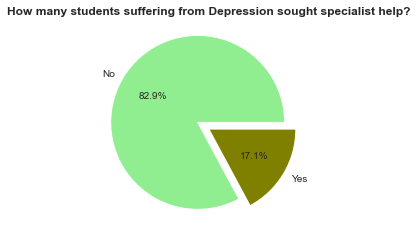

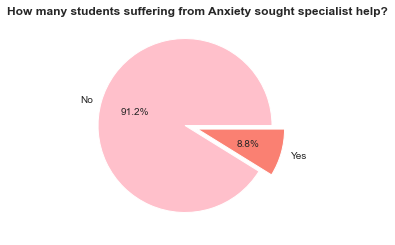

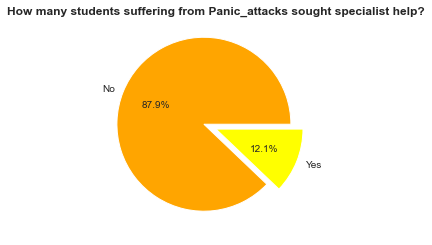

In [14]:
problems=['Depression','Anxiety','Panic_attacks']
x = [df1,df2,df3]
c = {0:['lightgreen','olive'],1:['pink','salmon'],2:['orange','yellow']}

for i in range(0,len(x)):
    plt.title(f"How many students suffering from {problems[i]} sought specialist help?",weight='bold')
    plt.pie(list(x[i]['Specialist_treatment'].value_counts()),
            labels=['No','Yes'],autopct="%.1f%%",
            colors=c[i],explode=explosion)
    plt.show()

* Only 17.1% of all depressed students sought professional help.
* 8.8% if all students suffering from anxiety sought professional help.
* Only 12.1% of all students experiencing pani attacks sought professional help.

## NUMBER OF MARRIED AND UNMARRIED STUDENTS IN THE UNIVERSITY

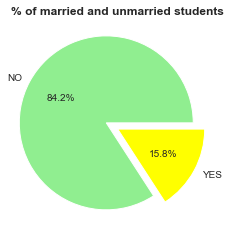

,Marital_status
No,85
Yes,16


In [15]:
plt.title('% of married and unmarried students',weight='bold')
plt.pie(list(df['Marital_status'].value_counts()),labels=['NO','YES'],explode=explosion,
       colors=['lightgreen','yellow'], autopct="%.1f%%")
plt.show()

pd.DataFrame(df['Marital_status'].value_counts())

Almost 16% of all students in the nuiversity are married, numerically speaking only 16.

# CORRELATION BETWEEN FEATURES

To create a correlation heatmap, we must first encode all the categorical columns.

In [16]:
newdf = df.drop(columns=['Date','Time'])       #creating a new dataframe dropping the date and time columns
from sklearn.preprocessing import LabelEncoder #importing LabelEncoder function
enc = LabelEncoder()
for i in newdf.columns:
    newdf[i] = enc.fit_transform(newdf[i]) #encoding
newdf.sample(5)

,Gender,Age,Course,Study_Year,CGPA,Marital_status,Depression,Anxiety,Panic_attacks,Specialist_treatment
73,1,0,7,0,0,0,0,0,0,0
77,0,0,21,1,3,0,0,0,1,0
53,0,2,47,2,3,1,1,1,1,0
58,0,0,2,0,4,0,0,0,0,0
45,1,0,2,0,4,0,0,1,1,0


<AxesSubplot:>

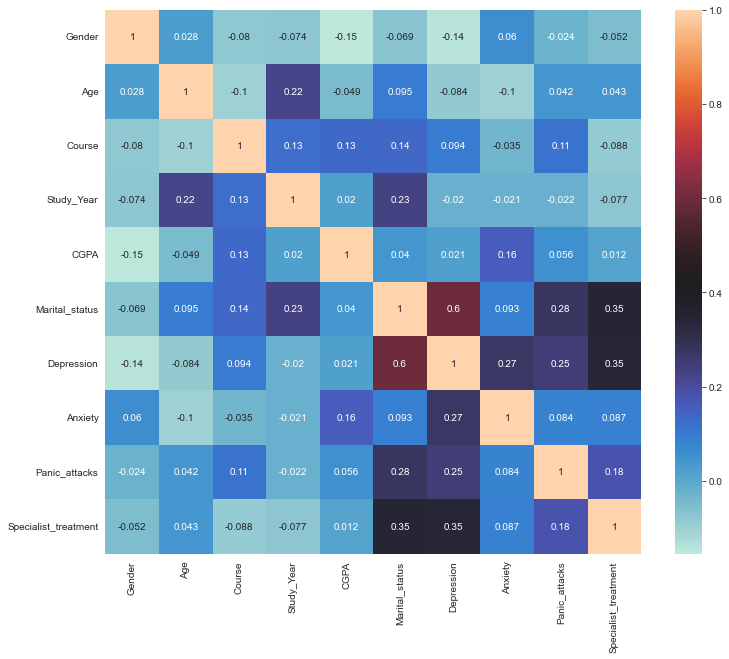

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data=newdf.corr(),cmap='icefire',annot=True)

* <code>Marital_status</code> is highly correlated to <code>Depression, Panic_attacks, Specialist_treatment</code>.
* <code>Depression</code> is also considerable correlated to <code> Anxiety & Panic_attacks</code>
* <code>Study_Year,</code> is considerably correlated to <code>Marital_status</code>
Hence, let us visualize relation between these features.

## HOW MANY MARRIED STUDENTS SUFFER FROM MENTAL ISSUES

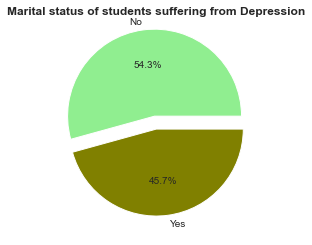

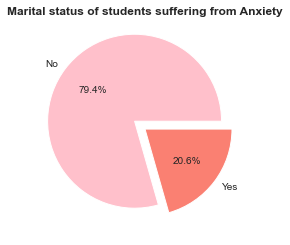

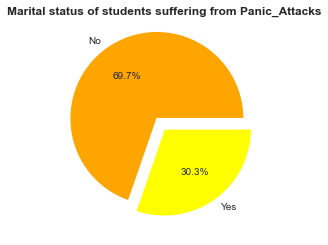

In [18]:
problems=['Depression','Anxiety','Panic_Attacks']
x = [df1,df2,df3]
c = {0:['lightgreen','olive'],1:['pink','salmon'],2:['orange','yellow']}

for i in range(0,len(x)):
    plt.title(f"Marital status of students suffering from {problems[i]}",weight='bold')
    plt.pie(list(x[i]['Marital_status'].value_counts()),
            labels=['No','Yes'],autopct="%.1f%%",
            colors=c[i],explode=explosion)
    plt.show()

As the heatmap had shown, there is a considerable amount of married students suffering from depression, anxiety and panic attacks.
* 45.7% of students suffering from depression are married
* 20.6% of students suffering from anxiety are married
* 30.3% of students experiencing panic attacks are married

## MARITAL STATUS OF STUDENTS BY STUDY YEAR

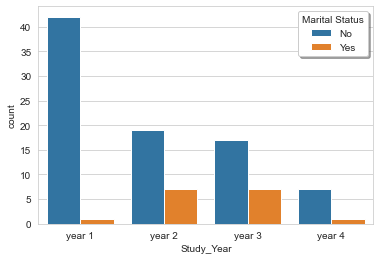

In [30]:
sns.countplot(data=df,x='Study_Year',hue='Marital_status')
plt.legend(shadow=True,title='Marital Status')

<code>year 2</code> & <code>year 3</code> students have the highest number of married. Both years have almost equal number. Same the case with <code>year 1</code> and <code>year 4</code>.

## PREVALENCE OF MENTAL PROBLEMS BY MARITAL STATUS

In [31]:
married = df[df['Marital_status']=='Yes'] #making a seperate dataframe containing only married students
married.head()

,Date,Time,Gender,Age,Course,Study_Year,CGPA,Marital_status,Depression,Anxiety,Panic_attacks,Specialist_treatment
3,08-07-2020,12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
6,08-07-2020,12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
11,08-07-2020,12:39,Female,24.0,Engineering,year 3,3.50 - 4.00,Yes,Yes,No,No,No
17,08-07-2020,12:52,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No
19,08-07-2020,13:07,Female,18.0,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,Yes,No


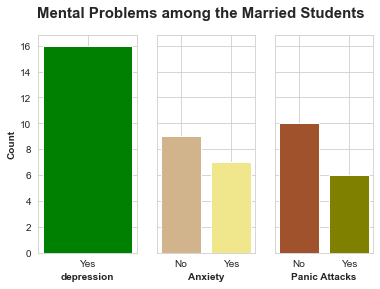

In [32]:
figure, axs = plt.subplots(ncols=3,nrows=1,sharey=True) #creating 3 subplots lying on the single row
plt.suptitle('Mental Problems among the Married Students',weight='bold',fontsize=15) #making a super title

axs[0].bar(married['Depression'].unique(),married['Depression'].value_counts(),color='green')
axs[0].set_xlabel('depression',weight='heavy')
axs[0].set_ylabel('Count',weight='heavy')

axs[1].bar(married['Anxiety'].unique(),married['Anxiety'].value_counts(),color=['tan','khaki'])
axs[1].set_xlabel('Anxiety',weight='heavy')

axs[2].bar(married['Panic_attacks'].unique(),married['Panic_attacks'].value_counts(),color=['sienna','olive'])
axs[2].set_xlabel('Panic Attacks',weight='heavy')

plt.show()

## MARITAL STATUS OF STUDENTS WHO HAVE TAKEN SPECIALIST TREATMENT

<AxesSubplot:xlabel='Specialist_treatment', ylabel='count'>

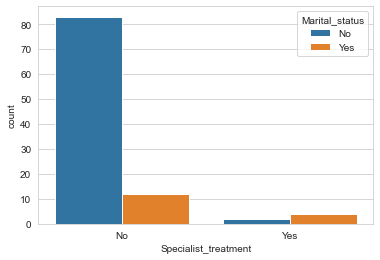

In [33]:
sns.countplot(data=df,x='Specialist_treatment',hue='Marital_status')

More unmarried students sought specialist treatment and Almost half of the number were married.

## PREVALENCE OF ANXIETY AND PANIC ATTACKS AMONG DEPRESSED STUDENTS

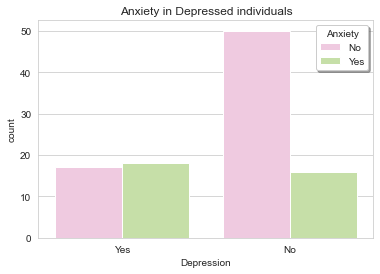

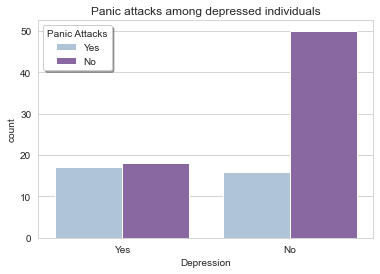

In [34]:
sns.countplot(data=df,x='Depression',hue='Anxiety',palette='PiYG').set_title('Anxiety in Depressed individuals')
plt.legend(shadow=True, title= 'Anxiety')
plt.show()
sns.countplot(data=df,x='Depression',hue='Panic_attacks',palette='BuPu').set_title(
    'Panic attacks among depressed individuals')
plt.legend(shadow=True,title = 'Panic Attacks')
plt.show()

The above visualization shows us that almost all of individuals suffering from depression are ALSO suffering either from Panic attacks and Anxiety.
The precise numbers can be obtained as shown below:

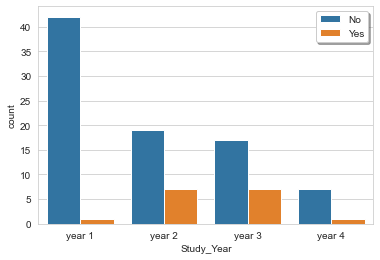

In [24]:
sns.countplot(data=df,x='Study_Year',hue='Marital_status')
plt.legend(shadow=True)

In [37]:
print('Students suffering from depression and anxiety: ',
      df[(df['Depression']=='Yes')&(df['Anxiety']=='Yes')].shape[0])

print('Students suffering from depression and panic attacks: ',
      df[(df['Depression']=='Yes')&(df['Panic_attacks']=='Yes')].shape[0])

print('Students suffering from Panic attacks & anxiety: ',
      df[(df['Panic_attacks']=='Yes')&(df['Anxiety']=='Yes')].shape[0])

print('Number of students suffering from all three problems: ',
      df[(df['Depression']=='Yes')&(df['Anxiety']=='Yes')&(df['Panic_attacks']=='Yes')].shape[0])

Students suffering from depression and anxiety:  18
Students suffering from depression and panic attacks:  17
Students suffering from Panic attacks & anxiety:  13
Number of students suffering from all three problems:  10
